# ***Evaluation of Official Inflation Rates on Youth's Shopping Cart in Turkey***

---
<center>
<h1>Contributors:</h1>
Aydın Aydemir<br>
İrem Kök<br>
Baran Pekkolay<br>
Göktuğ Korkulu<br>
Yağız Ay<br>
Doğa Anık<br>
</center>


---

### Introduction:
Inflation is a measure of the rate of increase in the average price level of goods and services. It's a key economic indicator monitored by government agencies and central banks worldwide. In Turkey, the Turkish Statistical Institute (TUIK) is responsible for calculating and publishing the official inflation rates. The validity of these published inflation rates, however, may vary among different population segments, based on the specific basket of goods and services they consume.

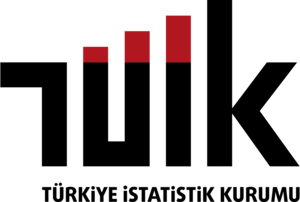

This project seeks to scrutinize the accuracy of TUIK's published inflation rates in the context of young people's consumer behavior in Turkey. It specifically aims to assess if these official inflation rates accurately reflect the price changes in goods and services frequently consumed by the younger generation.


---



# **Hypothesis**
To conduct this research, we have stated the following hypotheses:

 

*   Null Hypothesis (H0): Officially announced annual inflation rates are   
    accurately reflecting the average price increase percentage on the youth generation's shopping cart.

*   Alternative Hypothesis (H1): The officially announced annual inflation
    rates are not accurately reflecting the average price increase percentage on the youth generation's shopping cart.
<br>



---



# **Dataset(s)**

***Youth's Shopping Cart Datase***t: This dataset represents the price data for goods and services frequently consumed by the youth in Turkey. The data was collected via web scraping using Selenium from two prominent platforms in Turkey
 

1.   www.cimri.com
2.   www.akakce.com

The dataset comprises the prices of these goods and services on the specific date of 10.06.2023. The prices of items may vary; thus, the results might differ if the data collection process is performed on anoth




##*Data Collection Process*:
The web scraping process was done using Selenium, which allowed us to automate the web browsers and scrape the necessary information. Selenium was a suitable tool for this process as it could interact with the dynamic content on these web pages. The data from the two different platforms, cimri.com and akakce.com, were scraped independently and then concatenated together to form a single dataset.

Web scraping was performed in a respectful and responsible way, adhering to the terms of service of the respective websites and not overloading the servers.


---



In [190]:
# Neccesary import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score, calinski_harabasz_score

###*Data Concatenation*:
Before proceeding with the Exploratory Data Analysis (EDA), the datasets from the two websites were concatenated into a single dataset. This allowed for a comprehensive and uniform analysis. The concatenation process was done ensuring the consistency and integrity of the data.

This project involves a dynamic component as the prices of goods and services might fluctuate over time due to various factors. Therefore, the snapshot of the dataset represents the state of the market on 10.06.2023. The results derived from the analysis may vary if the same analysis is performed on a different date.


---



In [191]:
file1Path = '../data/datasets/akakceProducts.csv'
file2Path = '../data/datasets/cimriProducts.csv'

df1 = pd.read_csv(file1Path)
df2 = pd.read_csv(file2Path)

##concat two dataframes with dropping the header row of the 2nd dataframe
df = pd.concat([df1, df2], ignore_index=True)

row , col = df.shape
print("Number of rows: ", row)
print("Number of columns: ", col)

Number of rows:  445
Number of columns:  6


### **Some statistical properties of current dataframe.**


---



In [192]:
# Showing the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product Name   445 non-null    object
 1   Current Date   445 non-null    object
 2   Current Price  445 non-null    int64 
 3   Old Date       445 non-null    object
 4   Old Price      445 non-null    int64 
 5   Category       445 non-null    object
dtypes: int64(2), object(4)
memory usage: 21.0+ KB


#### Column descriptions
* `Product Name`: Name of the product.
* `Current Date`: The date when the dataset is formed.
* `Current Price`: The price of the product when the dataset is formed.
* `Old Date`: The oldest date that we can collect the price information.
* `Old Price`: The oldest price information that we can collect
* `Category`: Category of the product


### **Are there any missing values? If yes, drop.**


---



In [193]:
# Checking the missing values if there is any
df.isnull().sum()

Product Name     0
Current Date     0
Current Price    0
Old Date         0
Old Price        0
Category         0
dtype: int64

In [194]:
# Filtering the duplicated rows and printing the head of the dataframe
duplicates = df.duplicated()
numDuplicates = duplicates.sum()

print("Number of duplicated rows: ", numDuplicates)

Number of duplicated rows:  21


In [195]:
# Dropping the duplicated rows if there is any
# Printing the number of rows and columns after dropping the duplicated rows
wODuplicates = df[~duplicates]
rowUpdated, col = wODuplicates.shape

print("Number of rows after dropping the duplicated rows: ", rowUpdated)
print("Number of columns after dropping the duplicated rows: ", col)
print("Number of rows dropped: ", row - rowUpdated)

Number of rows after dropping the duplicated rows:  424
Number of columns after dropping the duplicated rows:  6
Number of rows dropped:  21


In [196]:
# Double checking if there is any duplicated rows
doubleCheckDf = wODuplicates.duplicated()
numDoubleCheck = doubleCheckDf.sum()

print("After double checking, number of duplicated rows: ", numDoubleCheck)

After double checking, number of duplicated rows:  0


### **Adding a new column that is the days between today and oldest date.**
[ Current Date - Old Date ]


---



In [197]:
# Converting the date columns to datetime format
# Calculating the difference between the current date and the old date
# Adding a new column to the dataframe which is the difference between the current date and the old date
df = wODuplicates

df['Current Date'] = pd.to_datetime(df['Current Date'], dayfirst=True)
df['Old Date'] = pd.to_datetime(df['Old Date'], dayfirst=True)
df['Days Passed'] = (df['Current Date'] - df['Old Date']).dt.days

In [198]:
# After cleaning the dataset, Exploring the dataset
df.head()

,Product Name,Current Date,Current Price,Old Date,Old Price,Category,Days Passed
0,SteelSeries Rival 3 RGB Kablolu Optik Oyuncu M...,2023-06-10,600,2022-06-10,289,mouse,365
1,SteelSeries Rival 5 RGB Kablolu Optik Oyuncu M...,2023-06-10,1199,2022-06-10,629,mouse,365
2,Pro Plan Sterilised Somonlu ve Ton Balıklı 10 ...,2023-06-10,1619,2022-06-10,760,kedi-mamasi,365
3,Nutella 750 gr Kakaolu Fındık Kreması,2023-06-10,95,2022-06-11,44,ezme-krem-cikolata,364
4,Royal Canin Sterilised 37 15 kg Kısırlaştırılm...,2023-06-10,1775,2022-06-10,975,kedi-mamasi,365


In [199]:
# Showing the statistical information of the dataset
df.describe()

,Current Date,Current Price,Old Date,Old Price,Days Passed
count,424,424.000000,424,424.000000,424.000000
mean,2023-06-09 06:47:32.830188800,2656.801887,2022-06-21 05:15:50.943396352,1839.313679,353.063679
min,2023-06-09 00:00:00,2.000000,2022-06-09 00:00:00,1.000000,39.000000
25%,2023-06-09 00:00:00,107.750000,2022-06-10 00:00:00,74.750000,359.000000
50%,2023-06-09 00:00:00,376.000000,2022-06-10 00:00:00,259.000000,364.000000
75%,2023-06-10 00:00:00,1634.750000,2022-06-15 00:00:00,1149.000000,365.000000
max,2023-06-10 00:00:00,49849.000000,2023-05-02 00:00:00,31329.000000,365.000000
std,NaN,5973.177317,NaN,3989.107391,37.530233


### **Adding a new column named Price Increase Percantage and inserting the values.**


---




In [200]:
df['Price Increase Percentage'] = (df['Current Price'] - df['Old Price']) / df['Current Price'] * 100

# Showing the statistical information of the dataset
df.describe()

,Current Date,Current Price,Old Date,Old Price,Days Passed,Price Increase Percentage
count,424,424.000000,424,424.000000,424.000000,424.000000
mean,2023-06-09 06:47:32.830188800,2656.801887,2022-06-21 05:15:50.943396352,1839.313679,353.063679,27.341911
min,2023-06-09 00:00:00,2.000000,2022-06-09 00:00:00,1.000000,39.000000,-75.145955
25%,2023-06-09 00:00:00,107.750000,2022-06-10 00:00:00,74.750000,359.000000,18.116650
50%,2023-06-09 00:00:00,376.000000,2022-06-10 00:00:00,259.000000,364.000000,31.084613
75%,2023-06-10 00:00:00,1634.750000,2022-06-15 00:00:00,1149.000000,365.000000,41.817688
max,2023-06-10 00:00:00,49849.000000,2023-05-02 00:00:00,31329.000000,365.000000,76.956522
std,NaN,5973.177317,NaN,3989.107391,37.530233,23.272023


In [201]:
# Creating a new dataframe named "df2"
# It will be sorted version of the "df" dataframe
# Sorting according to the "Current Price" column (descending order)
# Showing 3 products with the highest current price
df2 = df.sort_values(by=['Current Price'], ascending=False)

df2.head(3)

,Product Name,Current Date,Current Price,Old Date,Old Price,Category,Days Passed,Price Increase Percentage
126,Apple iPhone 13 Pro Max 5G 128GB 6GB Ram 6.7 i...,2023-06-09,49849,2022-06-10,31329,cep-telefonlari,364,37.152200
142,Apple Macbook Pro MYD82TU-A M1 8GB Ram 256GB S...,2023-06-09,34999,2022-06-10,21380,dizustu-bilgisayar,364,38.912540
17,iPhone 13 128 GB Yıldız Işığı,2023-06-10,32999,2022-06-10,17799,cep-telefonu,365,46.062002


In [202]:
# Creating a new dataframe named "df3"
# It will be sorted version of the "df" dataframe
# Sorting according to the "Price Increase Percentage" column (descending order)
# Showing 3 products with the highest price increase percentage
df3 = df.sort_values(by=['Price Increase Percentage'], ascending=False)

df3.head(3)

,Product Name,Current Date,Current Price,Old Date,Old Price,Category,Days Passed,Price Increase Percentage
241,Xiaomi 20000 mAh 2.1A - 3A Çift Çıkışlı Taşına...,2023-06-09,690,2022-06-10,159,tasinabilir-sarj-cihazi-powerbank,364,76.956522
411,HP 106A-W1106A Orjinal Toner,2023-06-09,410,2022-06-11,108,tonerler,363,73.658537
260,Assassins Creed III Special Edition PC,2023-06-09,323,2022-06-22,89,bilgisayar-oyunlari,352,72.445820


### **Plotting the "Current Price" Histogram**


---



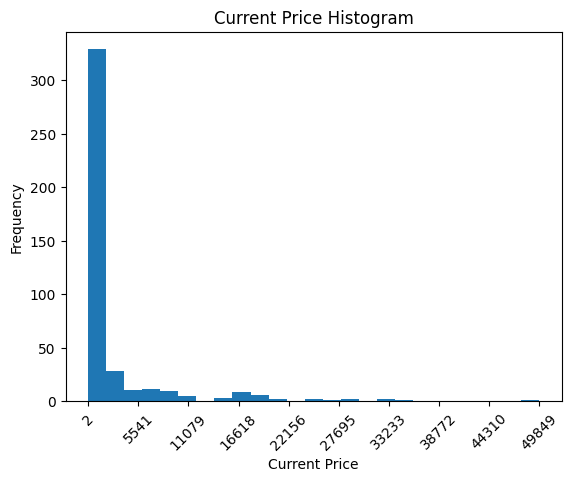

In [203]:
# Creating a histogram for the "Current Price" column with bins=25
plt.hist(df['Current Price'], bins=25)
plt.title("Current Price Histogram")
plt.xlabel("Current Price")
plt.ylabel("Frequency")
tick_positions = np.linspace(df['Current Price'].min(), df['Current Price'].max(), 10)
plt.xticks(rotation=45)
plt.xticks(tick_positions)

plt.show()

In [204]:
# Showing the statistical information of the "Current Price" column
print(df['Current Price'].describe())

count      424.000000
mean      2656.801887
std       5973.177317
min          2.000000
25%        107.750000
50%        376.000000
75%       1634.750000
max      49849.000000
Name: Current Price, dtype: float64


### **Plotting the "Old Price" Histogram**


---



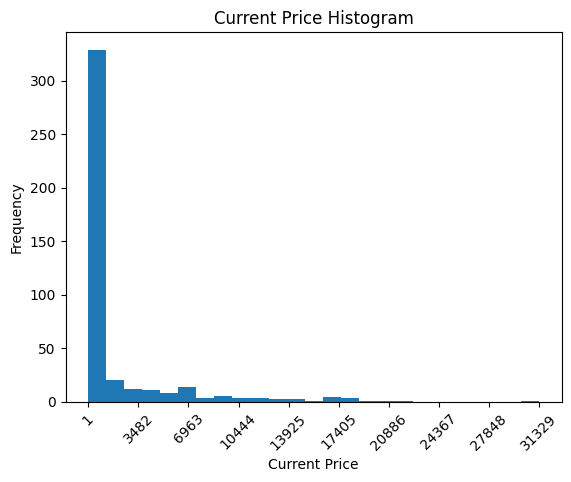

In [205]:
# Creating a histogram for the "Old Price" column with bins=25
plt.hist(df['Old Price'], bins=25)
plt.title("Current Price Histogram")
plt.xlabel("Current Price")
plt.ylabel("Frequency")
tick_positions = np.linspace(df['Old Price'].min(), df['Old Price'].max(), 10)
plt.xticks(rotation=45)
plt.xticks(tick_positions)
plt.show()

In [206]:
# Showing the statistical information of the "Old Price" column
print(df['Old Price'].describe())

count      424.000000
mean      1839.313679
std       3989.107391
min          1.000000
25%         74.750000
50%        259.000000
75%       1149.000000
max      31329.000000
Name: Old Price, dtype: float64


### **Plotting Correlation Heatmap Between ['Old Price', 'Current Price', 'Price Increase Percentage']**


---



In [207]:
# see if there is any strong correlation between the columns
corr = df[['Old Price', 'Current Price', 'Price Increase Percentage']].corr()

# Creation of the heatmap with Plotly
fig = go.Figure(data=go.Heatmap(z=corr,x=corr.columns,y=corr.columns,hoverongaps = False,colorscale='RdBu'))
fig.update_layout(title='Correlation Heatmap',xaxis_nticks=len(corr.columns),yaxis_nticks=len(corr.columns),autosize=False,width=500, height=500,margin=dict(l=100,r=100,b=100,t=100))
fig.show()

### **Plotting the relationship between the "Current Price" and "Price Increase Percentage"**


---



In [208]:
fig = px.scatter(df, x="Current Price", y="Price Increase Percentage", title="Current Price vs Price Increase Percentage")
fig.show()

### **Creating a new column named "Price Increase Status"**
* If the price increase percentage is below 0, it will be "***Decreased***"<br>
* If the price increase percentage is between 0 and 5, it will be "***Stable***"<br>
* If the price increase percentage is between 5 and 30, it will be "***Increased***"<br>
* If the price increase percentage is between 30 and 50, it will be "***Highly Increased***"<br>
* If the price increase percentage is above 50, it will be "***Extremely Increased***"<br>


---



In [209]:
def priceIncreaseStatus(priceIncreasePercentage):
    if priceIncreasePercentage < 0:
        return "Decreased"
    elif priceIncreasePercentage >= 0 and priceIncreasePercentage < 5:
        return "Stable"
    elif priceIncreasePercentage >= 5 and priceIncreasePercentage < 30:
        return "Increased"
    elif priceIncreasePercentage >= 30 and priceIncreasePercentage < 50:
        return "Highly Increased"
    else:
        return "Extremely Increased"
    

df['Price Increase Status'] = df['Price Increase Percentage'].apply(priceIncreaseStatus)

df.head()

,Product Name,Current Date,Current Price,Old Date,Old Price,Category,Days Passed,Price Increase Percentage,Price Increase Status
0,SteelSeries Rival 3 RGB Kablolu Optik Oyuncu M...,2023-06-10,600,2022-06-10,289,mouse,365,51.833333,Extremely Increased
1,SteelSeries Rival 5 RGB Kablolu Optik Oyuncu M...,2023-06-10,1199,2022-06-10,629,mouse,365,47.539616,Highly Increased
2,Pro Plan Sterilised Somonlu ve Ton Balıklı 10 ...,2023-06-10,1619,2022-06-10,760,kedi-mamasi,365,53.057443,Extremely Increased
3,Nutella 750 gr Kakaolu Fındık Kreması,2023-06-10,95,2022-06-11,44,ezme-krem-cikolata,364,53.684211,Extremely Increased
4,Royal Canin Sterilised 37 15 kg Kısırlaştırılm...,2023-06-10,1775,2022-06-10,975,kedi-mamasi,365,45.070423,Highly Increased


### **Visualizing the "Price Increase Status" column with a bar plot**


---






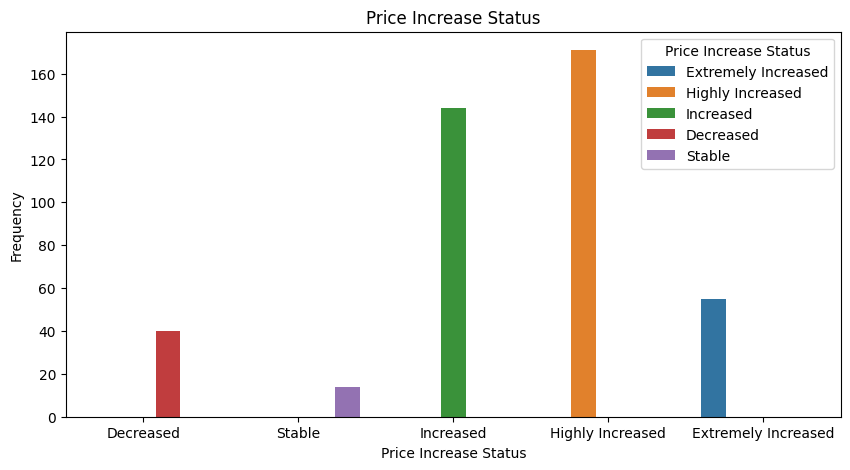

In [210]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Price Increase Status', hue='Price Increase Status', order = ['Decreased', 'Stable', 'Increased', 'Highly Increased', 'Extremely Increased'])
plt.title("Price Increase Status")
plt.xlabel("Price Increase Status")
plt.ylabel("Frequency")
plt.show()

### **Dropping negative price increase percentage values**


---



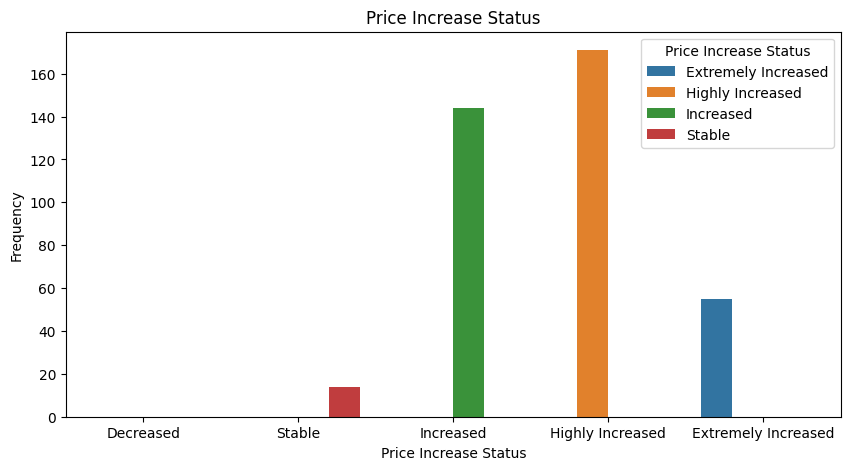

In [211]:
## Check if there is negative price increase percentage
## if there is any, drop it since it is impossible to have negative price increase percentage in Turkey's circumstances
df = df.drop(df[df['Price Increase Percentage'] < 0].index)

# Visualizing the "Price Increase Status" after dropping the negative price increase percentage
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Price Increase Status', hue='Price Increase Status', order = ['Decreased', 'Stable', 'Increased', 'Highly Increased', 'Extremely Increased'])
plt.title("Price Increase Status")
plt.xlabel("Price Increase Status")
plt.ylabel("Frequency")
plt.show()

### **Clustering the products according to their categories**


---



In [212]:
# Clustering the products according to their categories and showing the average price increase percentage for each category
fig = px.bar(avg_price_increase_by_category, 
             x="Category", 
             y="Price Increase Percentage", 
             color="Price Increase Percentage", 
             title='Average Price Increase Percentage by Category', 
             color_continuous_scale='Bluered')

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [213]:
# Do the same thing with interactive plot
fig = px.scatter(avg_price_increase_by_category, x='Category', y='Price Increase Percentage', color='Category')
fig.show()

# ***Finally..***
## Average Price Increase Percentage in our bucket.


---



In [214]:
# Calculating the enflation according to the dataset that we have
def inflationCalculator(df):
    # Calculating the average price increase percentage
    avgPriceIncreasePercentage = df['Price Increase Percentage'].mean()

    print("Average Price Increase Percentage: ", avgPriceIncreasePercentage)
    
    # Calculating the inflation
    inflation = avgPriceIncreasePercentage / 100 + 1  # 100 + 1 because the percentage is in the form of 1.05, 1.1, 1.15 etc.

    inflationPercentage = (inflation - 1) * 100
    
    # Returning the inflation
    return inflationPercentage

print("Inflation: ", inflationCalculator(df))

Average Price Increase Percentage:  32.82201087548103
Inflation:  32.82201087548102


# **Unsupervised Learning**
## **K-Means**

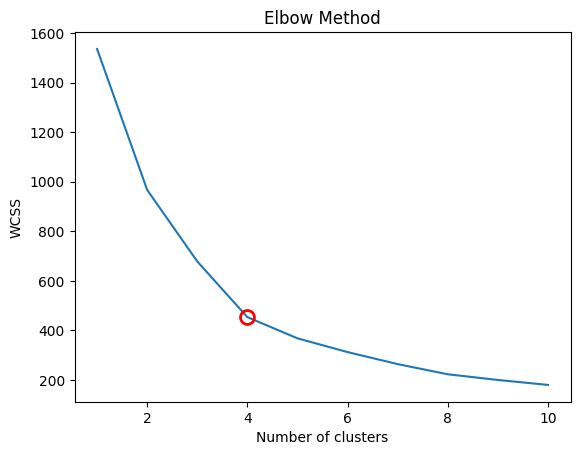

In [215]:
df_numeric = df.select_dtypes(include=[np.number])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

#CHOOSING THE RIGHT NUMBER OF CLUSTERS WITH ELBOW METHOD
wcss = []
# Create all possible cluster solutions with a loop
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    
# Plot the results
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.plot(4, wcss[4-1], marker='o', markersize=10, markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.show()

In [216]:
#RUNNING K-MEANS
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit and predict 
clusters = kmeans.fit_predict(df_scaled)
df['Cluster'] = clusters

fig = px.box(df, x="Cluster", y="Price Increase Percentage", 
             color="Cluster", color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

## **Analyzing the clusters**

In [218]:
silhouette_score = silhouette_score(df_scaled, clusters)
print("Silhouette Coefficient:", silhouette_score)

Silhouette Coefficient: 0.4137572733529747
